In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = './results'

In [3]:
collection_metrics = [
    "eth_exe_block_head_gas_used",
    "eth_exe_gas_price_gwei",
    "network_node_bytes_total_received",
    "cpu_iowait_seconds_total",
    "disk_node_reads_total",
    "process_cpu_seconds_total",
    "eth_exe_block_head_transactions_in_block"
]

### Compare GETH with Different Transaction Types

In [ ]:
## Comparing three different types of enclaves
enclave_names = [
    "singlenode-eoatx-geth",
    "singlenode-erctx-geth",
    "singlenode-deploy-destruct-geth",
]

In [ ]:
df

In [ ]:
overall_results = {} ## Key should be each metric

for enclave_name in enclave_names:
    for metric in collection_metrics:
        metric_fp = os.path.join(data_dir, f"{enclave_name}_{metric}.parquet")
        df = pd.read_parquet(metric_fp).assign(enclave_name=enclave_name)
        df["timestamp"] -= df["timestamp"].min()

        if metric == "process_cpu_seconds_total":
            df = df[df["consensus_client"].notna() & df["execution_client"].notna()]
        elif metric in ["network_node_bytes_total_received", "cpu_iowait_seconds_total", "disk_node_reads_total"]:
            df = df[df["client_type"] == "validator"]
        if metric not in overall_results:
            overall_results[metric] = df
        else:
            overall_results[metric] = pd.concat([overall_results[metric], df], axis=0)

KeyError: 'metric'

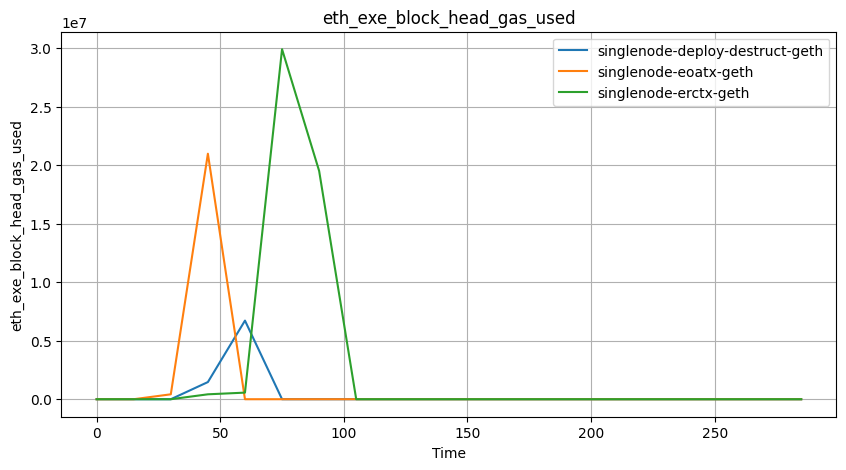

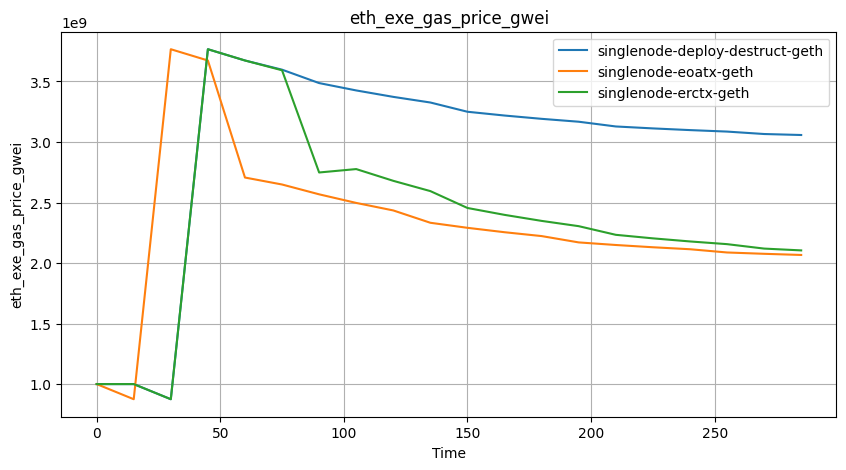

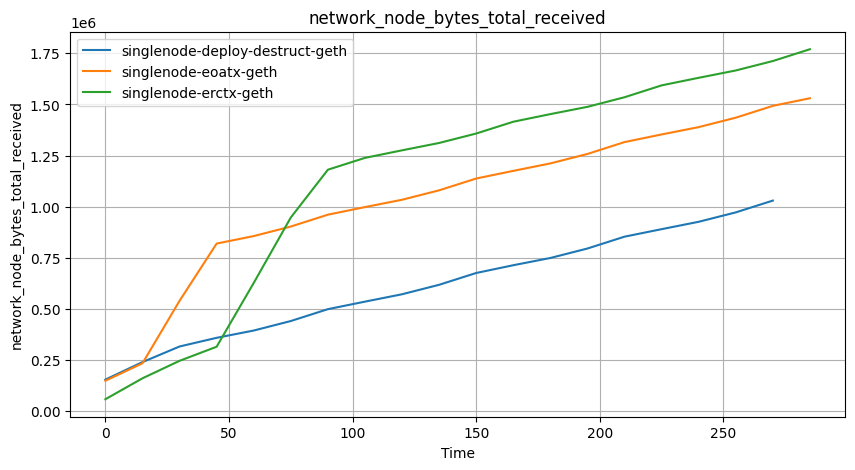

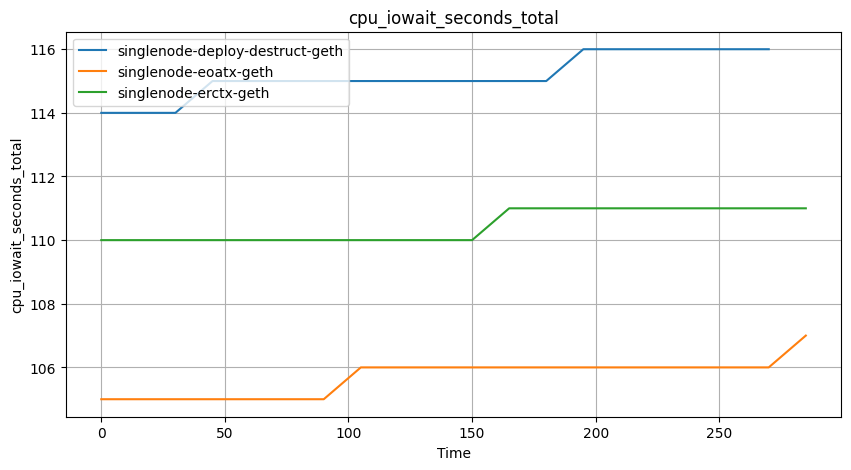

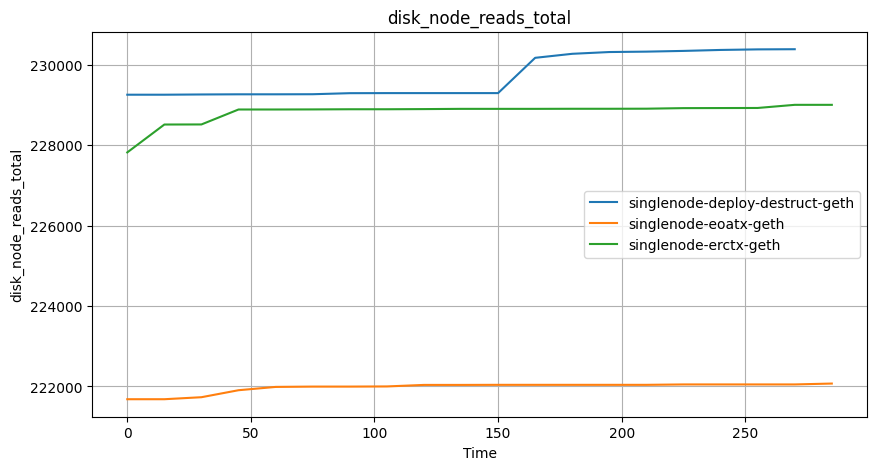

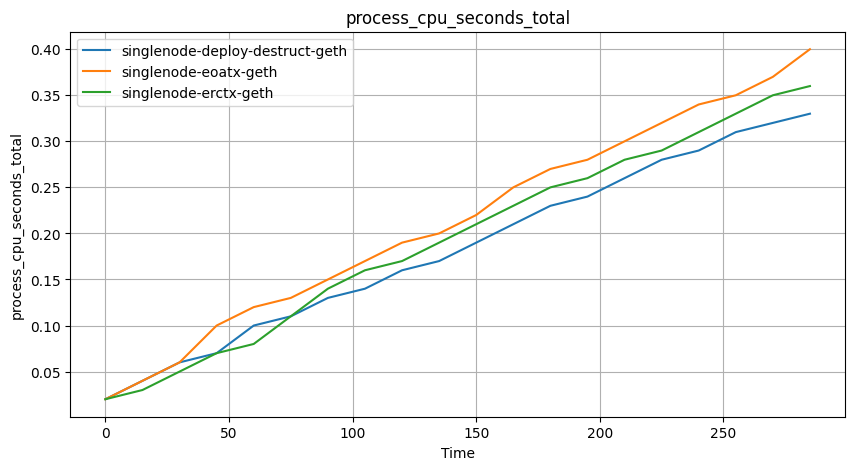

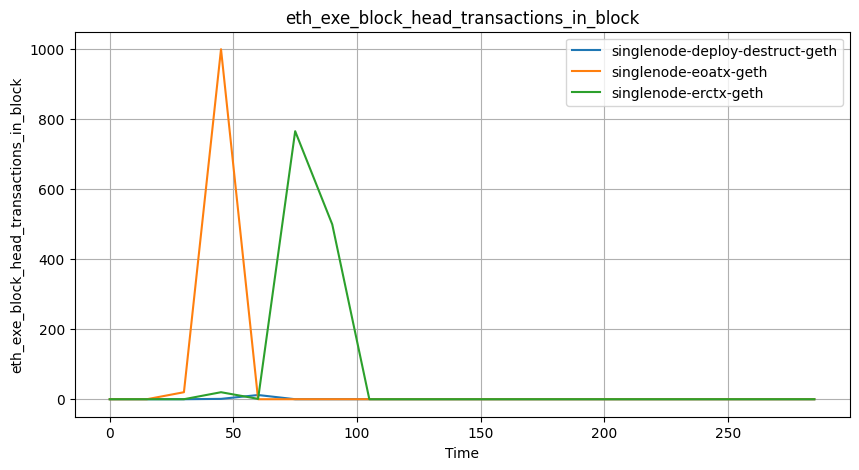

In [ ]:
## Plot a few metrics
for metric, df in overall_results.items():
    plt.figure(figsize=(10, 5))
    df["timestamp"] = df["timestamp"] - df.groupby("enclave_name")["timestamp"].transform("min")
    grouped = df.groupby("enclave_name")
    for key, group in grouped:
        plt.plot(group["timestamp"], group["value"], label=key)
    plt.xlabel("Time")
    plt.ylabel(metric)
    plt.title(metric)
    plt.grid(True)
    plt.legend()
    plt.show()

### Compare EOA with Different Client Types

In [27]:
enclave_names = [
    "singlenode-eoatx-geth",
    "singlenode-eoatx-besu",
    "singlenode-eoatx-erigon",
    "singlenode-eoatx-nethermind",
    "singlenode-eoatx-reth",
    "singlenode-eoatx-ethereumjs"
]

In [ ]:
overall_results = {} ## Key should be each metric

for enclave_name in enclave_names:
    for metric in collection_metrics:
        metric_fp = os.path.join(data_dir, f"{enclave_name}_{metric}.parquet")
        df = pd.read_parquet(metric_fp).assign(enclave_name=enclave_name)
        df["timestamp"] -= df["timestamp"].min()

        if metric == "process_cpu_seconds_total":
            df = df[df["consensus_client"].notna() & df["execution_client"].notna()]
        elif metric in ["network_node_bytes_total_received", "cpu_iowait_seconds_total", "disk_node_reads_total"]:
            df = df[df["client_type"] == "validator"]
        if metric not in overall_results:
            overall_results[metric] = df
        else:
            overall_results[metric] = pd.concat([overall_results[metric], df], axis=0)

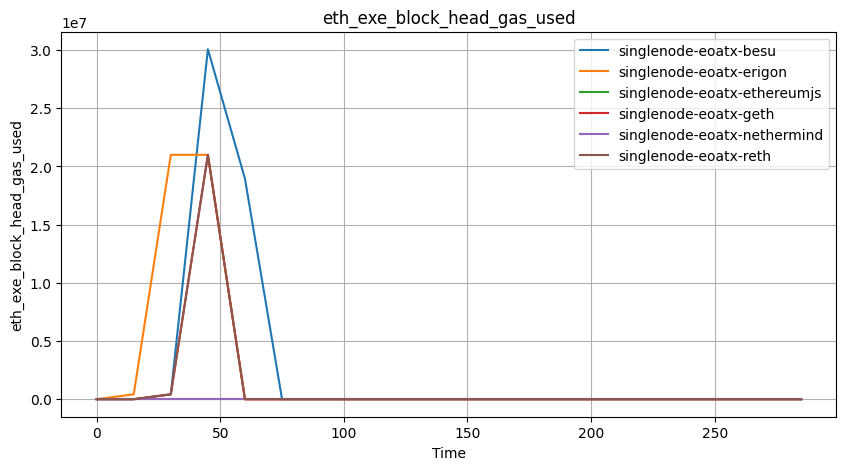

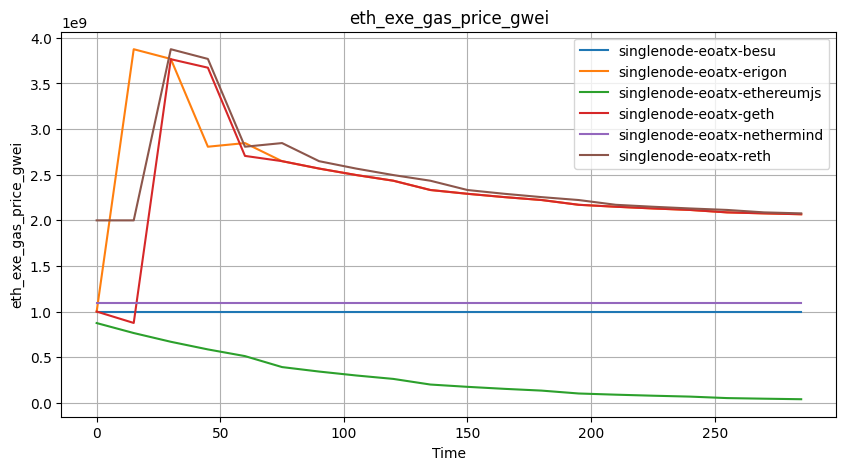

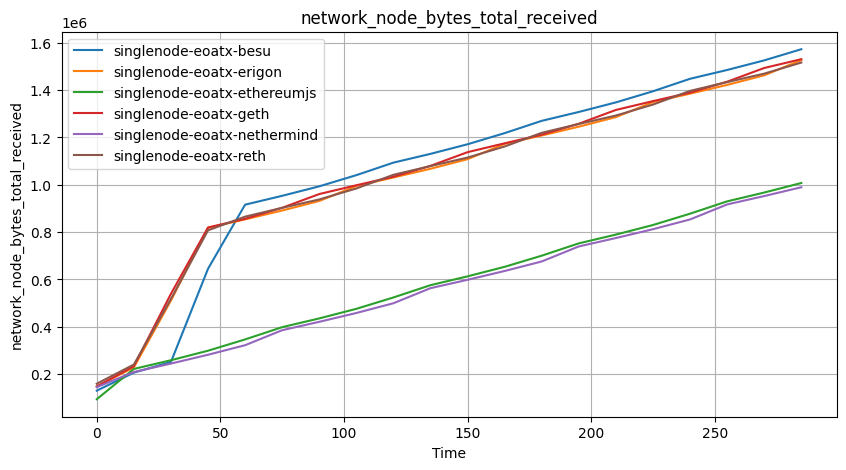

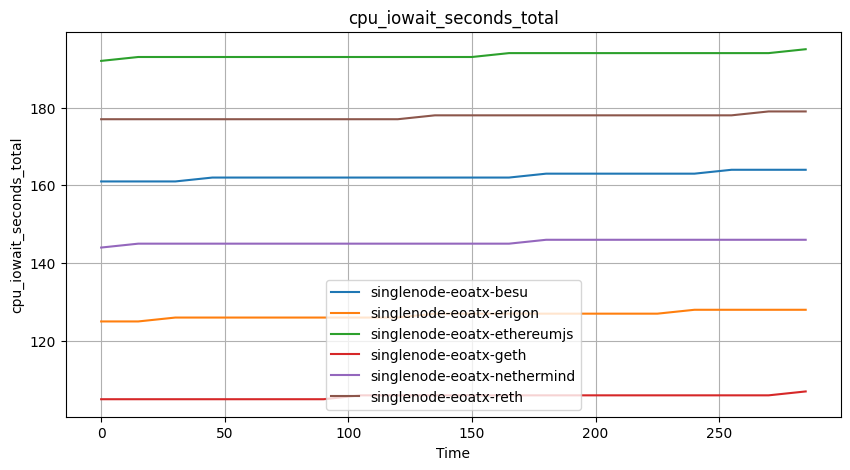

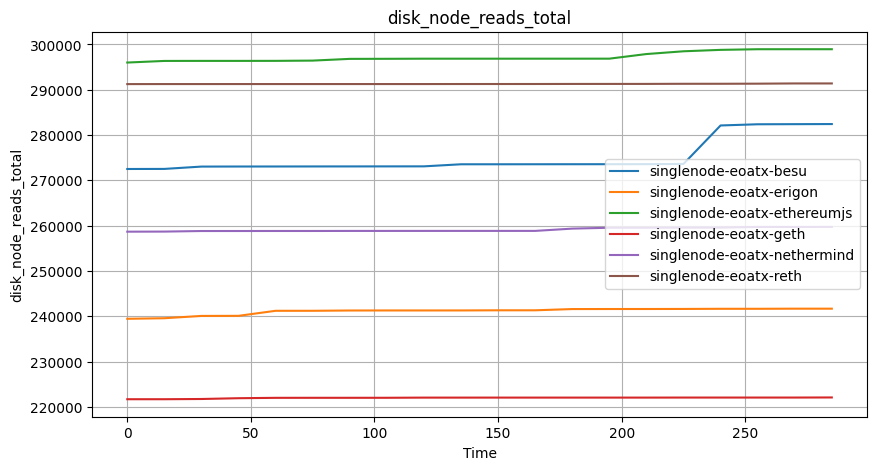

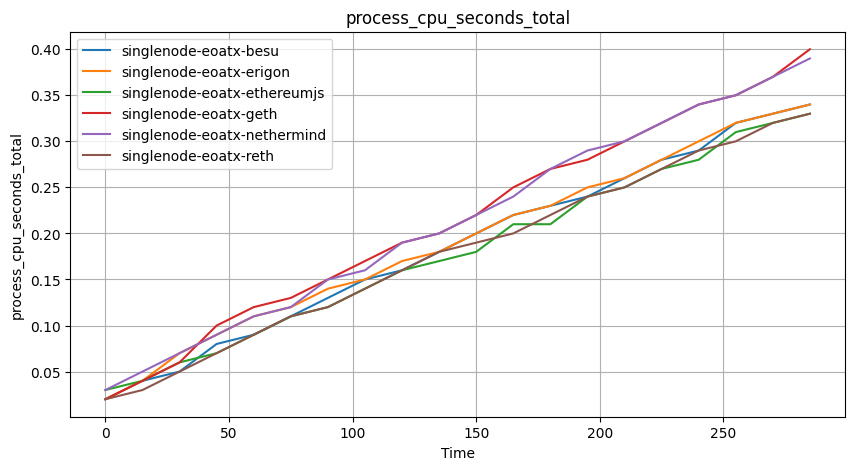

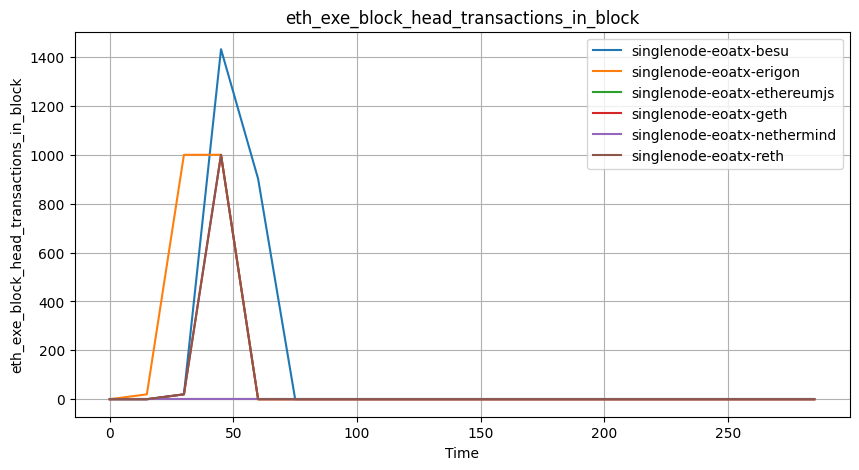

In [ ]:
## Plot a few metrics
for metric, df in overall_results.items():
    plt.figure(figsize=(10, 5))
    df["timestamp"] = df["timestamp"] - df.groupby("enclave_name")["timestamp"].transform("min")
    grouped = df.groupby("enclave_name")
    for key, group in grouped:
        plt.plot(group["timestamp"], group["value"], label=key)
    plt.xlabel("Time")
    plt.ylabel(metric)
    plt.title(metric)
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
## CPU time break down


In [ ]:
## Disk read write break down